In [68]:
#import section

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv("car data.csv")


In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#printing the shape of the dataframe
df.shape

(301, 9)

In [11]:
# findinng out the categorial features of the shape



print(df["Seller_Type"].unique()) 
print(df["Transmission"].unique())
print(df["Owner"].unique())


['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [12]:
#deploying unique features with help of loop

for i in df.columns:
    if df[i].dtype == 'O':
        print (df[i].unique())


['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [13]:
#check the missing values or null values
# the sum is showing that the count of null values for each features is zero

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
#checking all the columns in the dataframe

df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [16]:
#dropping off the car name from the dataframe:
df2 = df.drop("Car_Name",axis=1)

In [17]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
#inserting a new feature into the dataframe(df2)
df2[["Current_Year"]]= 2022

In [19]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [20]:
df2["Age_of_the_car"]=df2["Current_Year"]-df2["Year"]

In [21]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age_of_the_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [25]:
#dropping the year and cuurent year from dataframe 2 as we wont be needing them anymore


df2.drop(['Year'],axis=1,inplace=True)
df2.drop(['Current_Year'],axis=1,inplace=True)

In [26]:
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_the_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [27]:
#using one hot encoding and making a third data set

df3 = pd.get_dummies(df2,drop_first=True)

In [28]:
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_the_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [29]:
#finding the correlation among the fetaures
df3.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_the_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age_of_the_car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [39]:
# finding correlation with the target variable: (Selling price)

def correlation_target(data,target_column):
    data_new = data.drop([target_column],axis=1)
    indep_cols = data_new.columns

    correlation_result = []

    for col in indep_cols:
        correlation_result.append(data[target_column].corr(data[col]))

    result_df = pd.DataFrame([indep_cols,correlation_result],index = ["Features","Correlation"]).T

    return result_df.sort_values("Correlation",ascending=False)





In [40]:
# calling the function to print the correlation of selling price vs the other features
correlation_target(df3,"Selling_Price")

,Features,Correlation
0,Present_Price,0.878983
4,Fuel_Type_Diesel,0.552339
1,Kms_Driven,0.029187
2,Owner,-0.088344
3,Age_of_the_car,-0.236141
7,Transmission_Manual,-0.367128
5,Fuel_Type_Petrol,-0.540571
6,Seller_Type_Individual,-0.550724


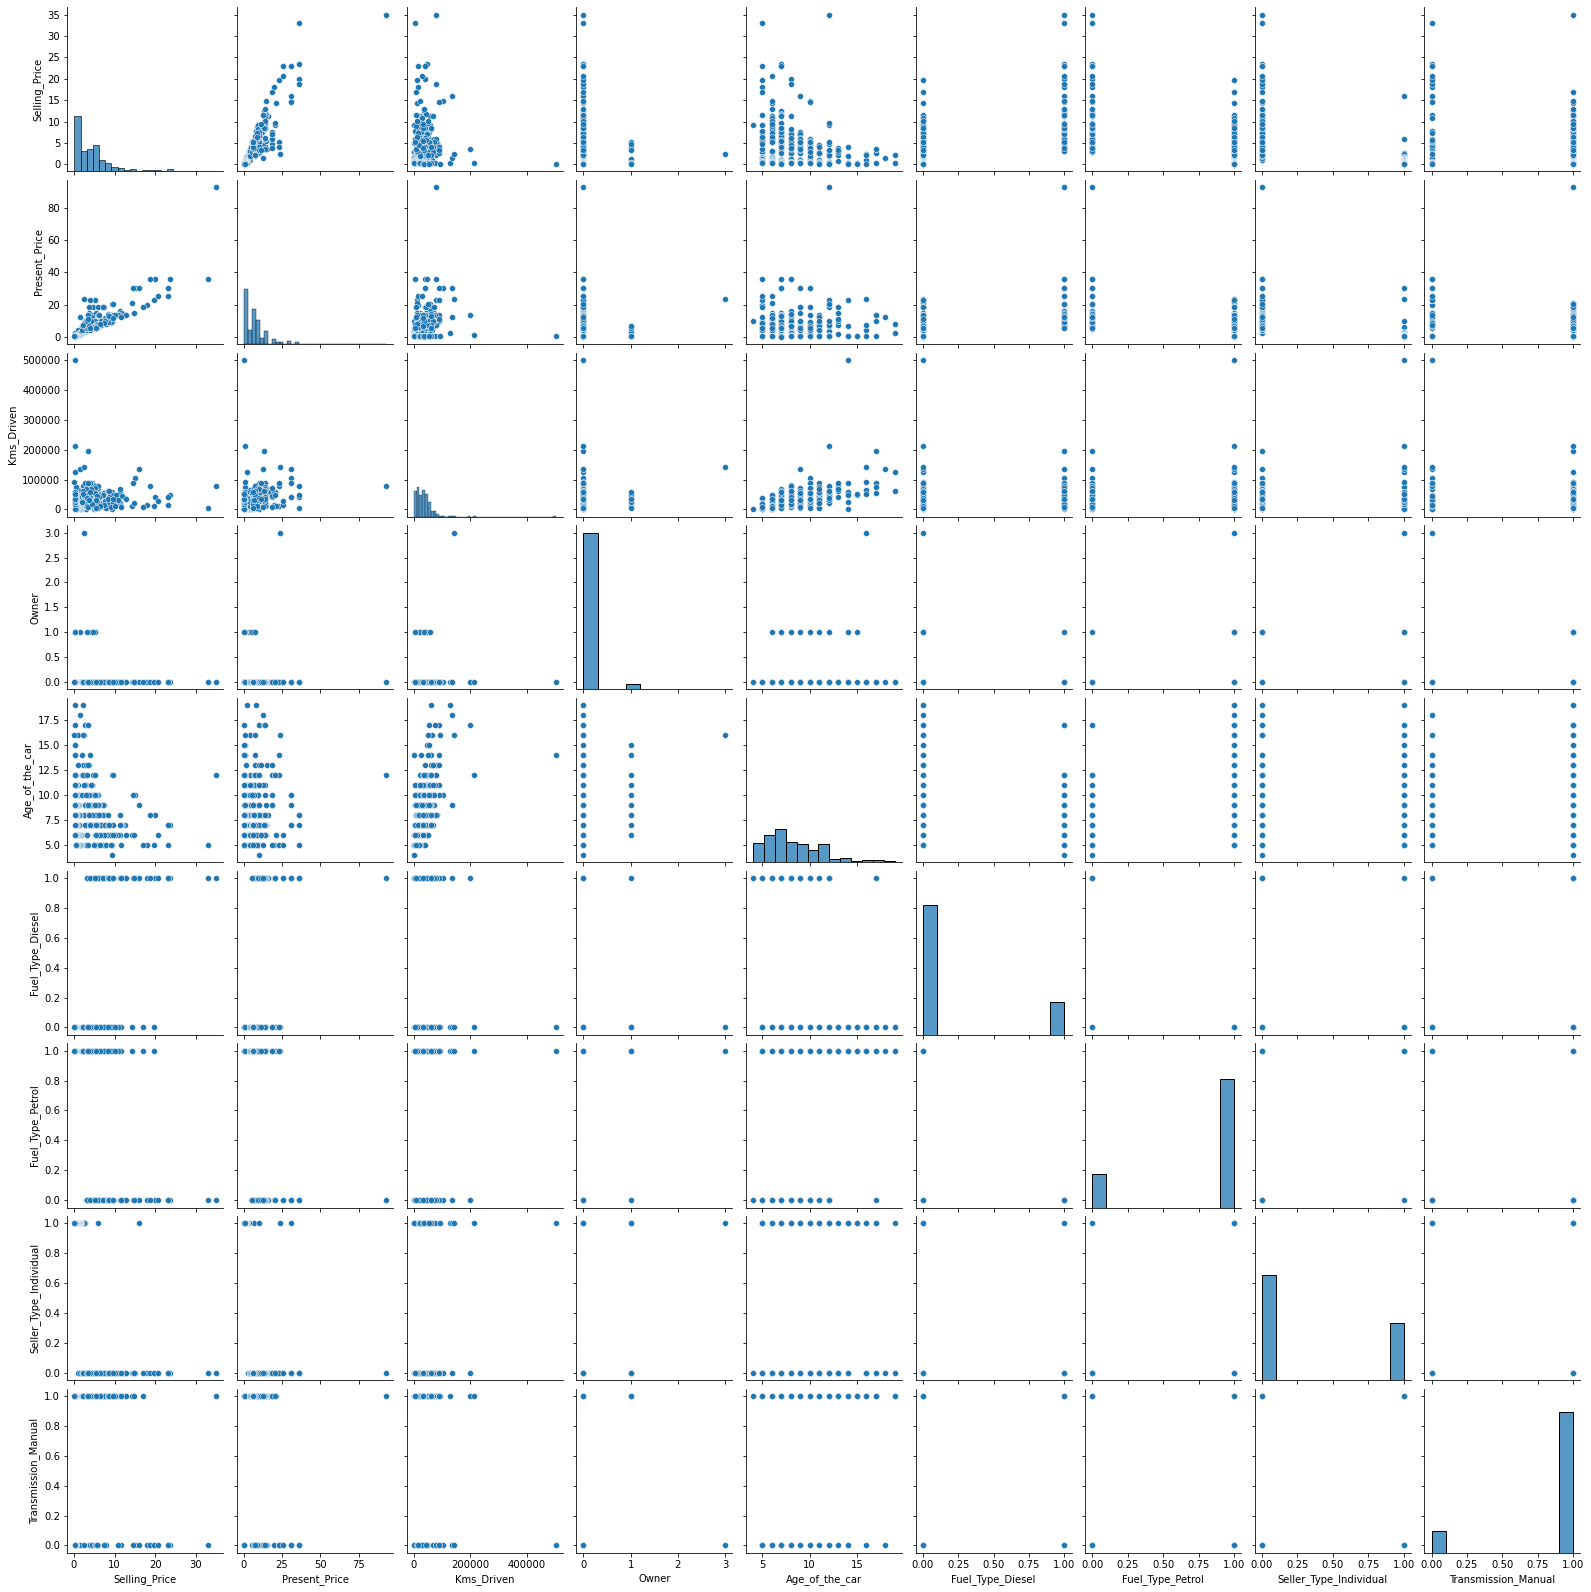

In [31]:
# plotting pairplot to diagramitically deduce the featurs
sns.pairplot(df3)

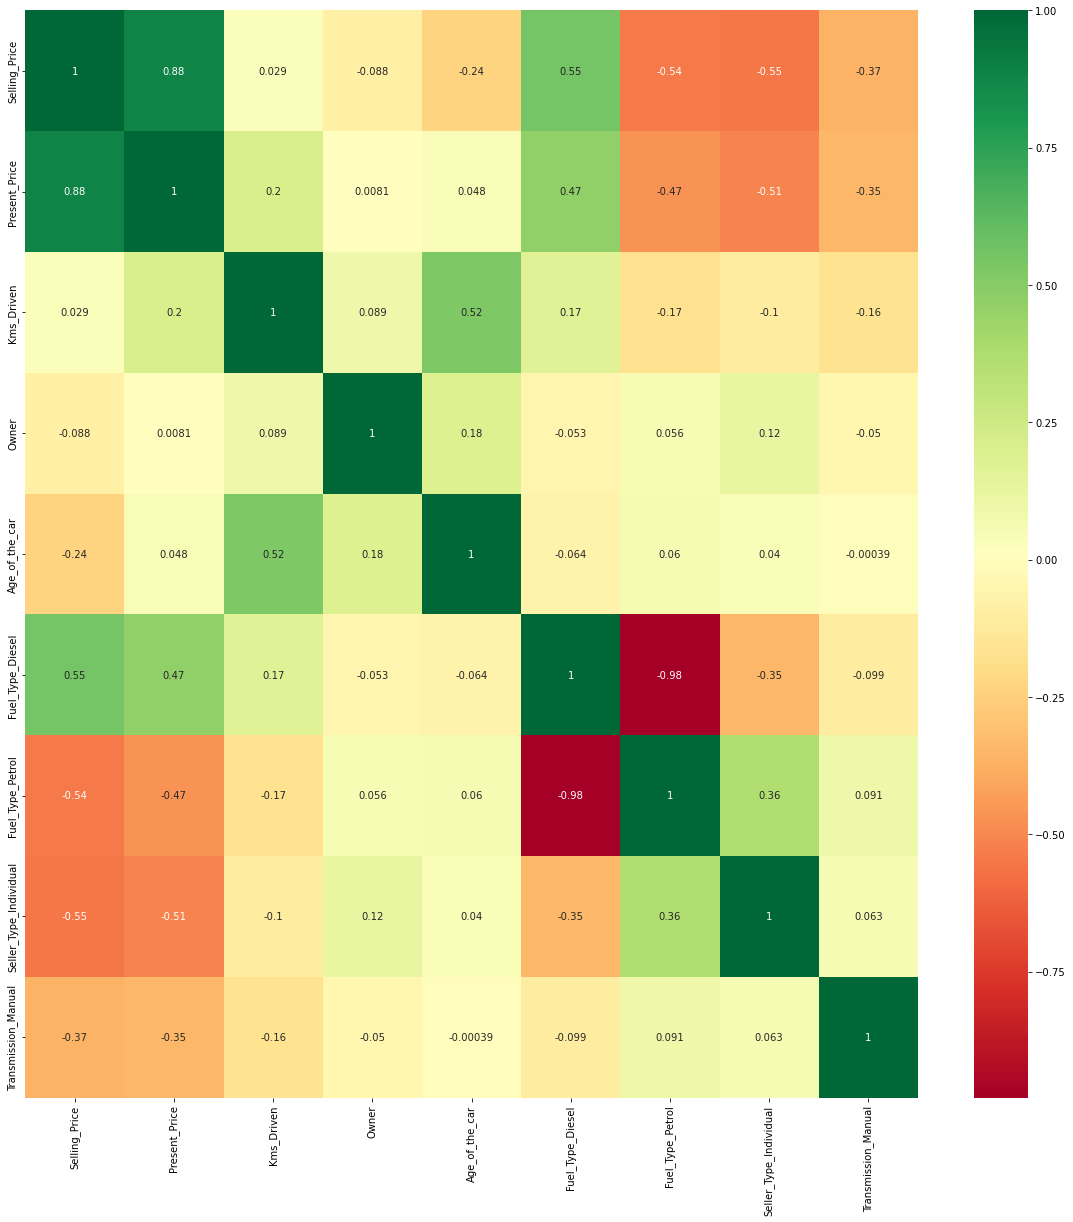

In [35]:
#better representation of correlation using sns heatmap

corrmat = df3.corr()
top_cor_features = corrmat.index
plt.figure(figsize=(20,20))

#plotting heat map
g = sns.heatmap(df3[top_cor_features].corr(),annot=True,cmap="RdYlGn")

In [36]:
#independent and dependent features

X = df3.iloc[:,1:]
y = df3.iloc[:,0]

In [37]:
X.head()

,Present_Price,Kms_Driven,Owner,Age_of_the_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [38]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [42]:
#Feature importance

model = ExtraTreesRegressor()
model.fit(X,y)

# printing the feature imporrtance of the columns:

print(model.feature_importances_)



[0.35697409 0.04129585 0.00094354 0.07267678 0.24704589 0.0057402
 0.12330467 0.15201898]


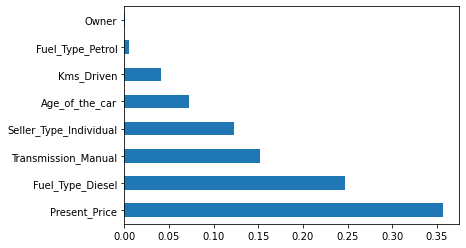

In [44]:
#plotting graph of feature importance  for better visualization

feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.nlargest(8).plot(kind= 'barh')
plt.show()

In [46]:
#applying the train test split 

X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size= 0.2)


In [47]:
X_train.shape

(240, 8)

In [59]:
# Model building
def Model_building(Model ,Model_name ,X,y):

    X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size= 0.2)
    model.fit(X_train ,y_train)
    y_pred = model.predict(X_test)
    r2Score = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    temp = [Model_name,r2Score,rmse]

    return temp


In [60]:
#testing the custom function

Model_building(LinearRegression(),"Linear_Regression",X,y)


['Linear_Regression', 0.9743016807220591, 0.7130011217888305]

In [65]:
# custom function for model building ( not conducting any PCA and cross validation)

def build_multiple_model(X,y):

    col_names = ['Model_name','r2_Score','RMSE']

    result_df = pd.DataFrame(columns=col_names)

    result_df.loc[len(result_df)] = Model_building(LinearRegression(),'Linear_regression',X,y)
    result_df.loc[len(result_df)] = Model_building(Lasso(),'Lasso',X,y)
    result_df.loc[len(result_df)] = Model_building(Ridge(),'Ridge',X,y)
    result_df.loc[len(result_df)] = Model_building(DecisionTreeRegressor(),'Decision_Tree_Regressor',X,y)
    result_df.loc[len(result_df)] = Model_building(KNeighborsRegressor(),'KNN_Regressor',X,y)
    result_df.loc[len(result_df)] = Model_building(SVR(),'Support_vector_Regressor',X,y)
    result_df.loc[len(result_df)] = Model_building(RandomForestRegressor(),'Random_Forest_Regressor',X,y)
    result_df.loc[len(result_df)] = Model_building(AdaBoostRegressor(),'AdaBoostRegressor',X,y)
    result_df.loc[len(result_df)] = Model_building(GradientBoostingRegressor(),'GradientBoostingRegressor',X,y)
    result_df.loc[len(result_df)] = Model_building(XGBRegressor(),'XGBRegressor',X,y)


    return result_df.sort_values('r2_Score',ascending=False)

In [66]:
build_multiple_model(X,y)

,Model_name,r2_Score,RMSE
5,Support_vector_Regressor,0.980140,0.636291
0,Linear_regression,0.968804,0.820758
9,XGBRegressor,0.955669,0.798834
3,Decision_Tree_Regressor,0.951558,0.838160
2,Ridge,0.930909,0.779702
7,AdaBoostRegressor,0.828651,2.671622
4,KNN_Regressor,0.814553,2.809098
8,GradientBoostingRegressor,0.761633,2.804428
1,Lasso,0.753222,2.727018
6,Random_Forest_Regressor,0.733714,2.892611


In [72]:
#applying random forest regressor , we are not scaling the values  as it uses decision trees to predict
# we slecting randomforest regressor 
best_model = RandomForestRegressor()

In [67]:
## setting the hyper parameters for the model

n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [70]:
#randomized search CV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#number of features to be considered at every split
max_features = ['auto','sqrt']

#maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

#minumum number of samples required to split a node

min_samples_split = [2,5,10,15,100]

#minimum number of samples required at each node

min_samples_leaf =[1,2,5,10]




In [71]:
#creating the random grid

random_grid = {"n_estimators":n_estimators,
                "max_features":max_features,
                "max_depth":max_depth,
                "min_samples_split":min_samples_split,
                "min_samples_leaf":min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [73]:
best_model = RandomForestRegressor()

In [74]:
#assgning parameters to the randomizedserach cv

best_model_random = RandomizedSearchCV(estimator = best_model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,random_state= 42,n_jobs=1)

In [75]:
#fiting the training values to the randomforestregeressor model

best_model_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [76]:
#now we are going ahead with the predictions

predictions = best_model_random.predict(X_test)

In [77]:
predictions

array([ 5.02242994,  9.56788511,  0.56838112,  0.22840598,  0.68639997,
        6.12470272, 12.49367766,  7.98646096,  5.105099  ,  2.80964881,
        6.00891877,  0.68502027,  0.58246167,  4.90142509,  0.26870125,
        4.60548846,  1.02277794,  5.1123867 ,  4.4385017 ,  9.17678534,
        0.5851073 ,  0.44087458,  1.14805192,  7.47654661, 12.632674  ,
        1.27890331,  5.55141639,  5.28079137,  5.75179484,  2.49358904,
        0.44348799,  8.07713807,  6.67736442,  6.76031735,  7.98646096,
        0.52727025,  7.32488824,  1.26727535, 11.74578307,  6.49809748,
        4.51210242, 18.89791015,  4.69112728,  0.20314867,  5.94108481,
        4.59936032,  4.31233452,  1.22094687,  0.66967018,  4.70134485,
        5.30632143,  0.48654835,  0.20373029,  5.46393831,  4.12615567,
        5.34213771,  4.75751941,  4.06596869,  7.59207249,  5.13450029,
        0.5717777 ])

f:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

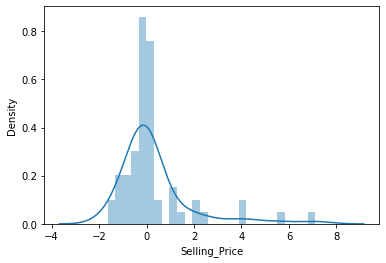

In [84]:
# to check a better representation  about comparing the predictions against y_test

sns.distplot(y_test-predictions)

# it is showing a normal distribution


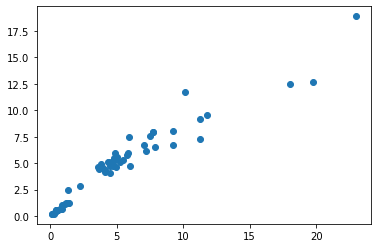

In [83]:
#using a scatter plot to render the distribition

plt.scatter(y_test,predictions)

# the graph shows a linear trend in the data which shows good prediction in the model


In [86]:
# use of pickle to open a file to store the data

import pickle

file = open("Random_forest_regression_model.pkl",'wb')

#dumping the model information to that file
pickle.dump(best_model_random,file)